> importing the Libraries 

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

> importing the dataset

In [9]:
df = pd.read_csv('./data/accidental-deaths-in-usa-monthly.csv')
df.head()

,Month,"Accidental deaths in USA: monthly, 1973 ? 1978"
0,1973-01,9007
1,1973-02,8106
2,1973-03,8928
3,1973-04,9137
4,1973-05,10017


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Month                                           72 non-null     object
 1   Accidental deaths in USA: monthly, 1973 ? 1978  72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [11]:
df = df.rename(columns={'Accidental deaths in USA: monthly, 1973 ? 1978': 'Deaths'})
df.columns

Index(['Month', 'Deaths'], dtype='object')

In [12]:
df['Month'] = pd.to_datetime(df['Month'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Month   72 non-null     datetime64[ns]
 1   Deaths  72 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


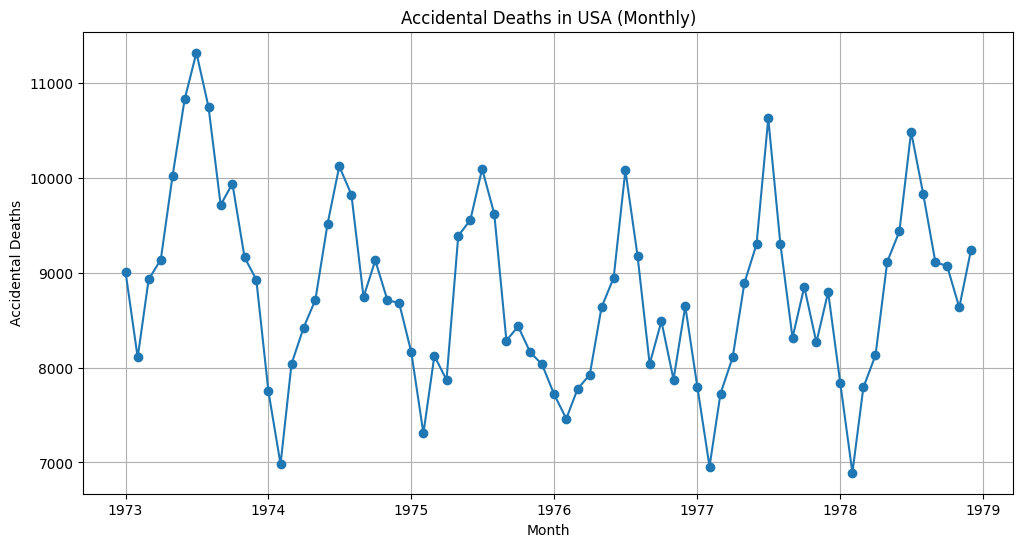

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(df['Month'], df['Deaths'], marker='o')
plt.xlabel('Month')
plt.ylabel('Accidental Deaths')
plt.title('Accidental Deaths in USA (Monthly)')
plt.grid(True)
plt.show()

In [16]:
# Extract month name from the datetime column
df['Month_Name'] = df['Month'].dt.strftime('%B')

# Group by month name and calculate average deaths
monthly_deaths = df.groupby('Month_Name')['Deaths'].mean().sort_values()

print("Months with lower deaths:")
print(monthly_deaths.head())

print("\nMonths with higher deaths:")
print(monthly_deaths.tail())

Months with lower deaths:
Month_Name
February    7283.833333
January     8044.000000
March       8063.833333
April       8264.833333
November    8467.166667
Name: Deaths, dtype: float64

Months with higher deaths:
Month_Name
October     8984.666667
May         9126.166667
June        9595.333333
August      9749.166667
July       10452.833333
Name: Deaths, dtype: float64


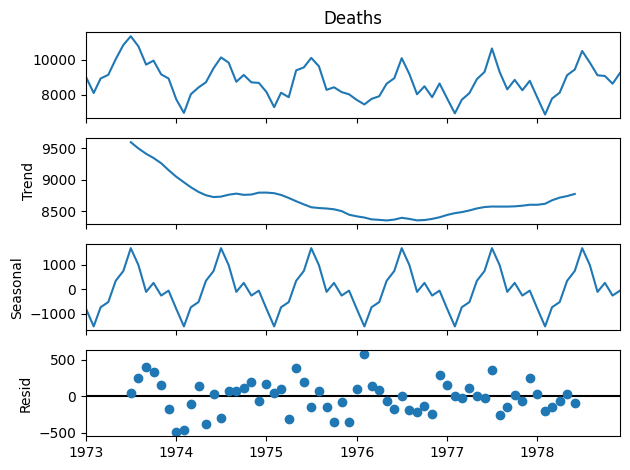

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Make sure your data is sorted by date
df = df.sort_values('Month')

# Set 'Month' as index
df.set_index('Month', inplace=True)

# Decompose the time series
result = seasonal_decompose(df['Deaths'], model='additive', period=12)

# Plot the decomposition
result.plot()
plt.show()

In [18]:
# Summary statistics for the 'Deaths' column
print("Mean:", df['Deaths'].mean())
print("Median:", df['Deaths'].median())
print("Min:", df['Deaths'].min())
print("Max:", df['Deaths'].max())
print("Standard Deviation:", df['Deaths'].std())

Mean: 8787.736111111111
Median: 8728.5
Min: 6892
Max: 11317
Standard Deviation: 958.3380125421589


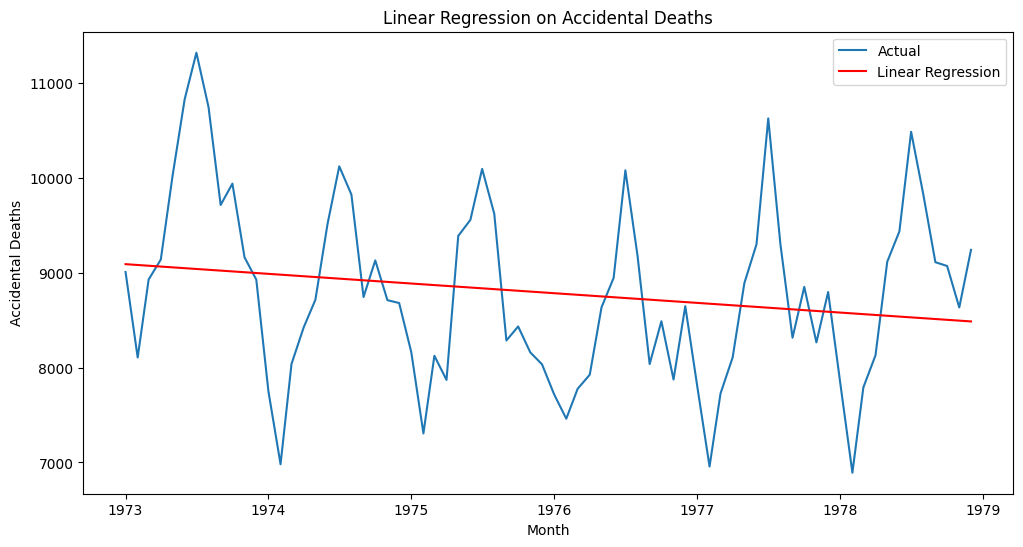

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Reset index to get 'Month' as a column
df_reset = df.reset_index()

# Convert 'Month' to ordinal for regression
df_reset['Month_ordinal'] = df_reset['Month'].map(lambda x: x.toordinal())

# Fit linear regression
X = df_reset[['Month_ordinal']]
y = df_reset['Deaths']
model = LinearRegression()
model.fit(X, y)

# Predict and plot
df_reset['Predicted_Deaths'] = model.predict(X)
plt.figure(figsize=(12, 6))
plt.plot(df_reset['Month'], df_reset['Deaths'], label='Actual')
plt.plot(df_reset['Month'], df_reset['Predicted_Deaths'], label='Linear Regression', color='red')
plt.xlabel('Month')
plt.ylabel('Accidental Deaths')
plt.title('Linear Regression on Accidental Deaths')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score

# Calculate R2 score for the linear regression model
r2 = r2_score(df_reset['Deaths'], df_reset['Predicted_Deaths'])
print("R2 Score:", r2)

R2 Score: 0.034473190313992874


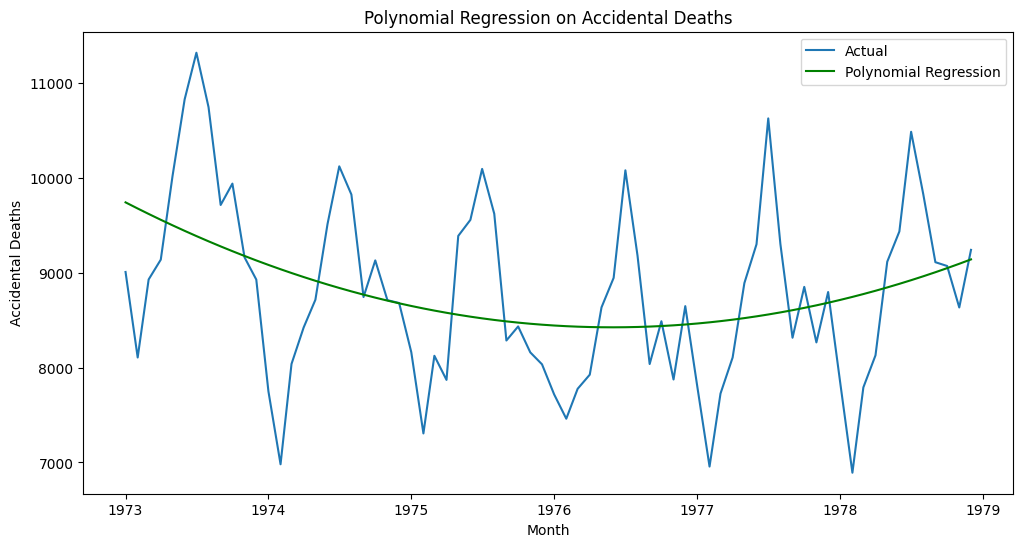

In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Prepare data
X = df_reset[['Month_ordinal']]
y = df_reset['Deaths']

# Transform features to polynomial
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Fit polynomial regression
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

# Predict and plot
df_reset['Predicted_Deaths_Poly'] = model_poly.predict(X_poly)
plt.figure(figsize=(12, 6))
plt.plot(df_reset['Month'], df_reset['Deaths'], label='Actual')
plt.plot(df_reset['Month'], df_reset['Predicted_Deaths_Poly'], label='Polynomial Regression', color='green')
plt.xlabel('Month')
plt.ylabel('Accidental Deaths')
plt.title('Polynomial Regression on Accidental Deaths')
plt.legend()
plt.show()

In [24]:
from sklearn.metrics import r2_score

# Calculate R2 score for the polynomial regression model
r2_poly = r2_score(df_reset['Deaths'], df_reset['Predicted_Deaths_Poly'])
print("Polynomial Regression R2 Score:", r2_poly)

Polynomial Regression R2 Score: 0.13683000903893328


In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA model (order can be tuned, here (1,1,1) is a starting point)
model = ARIMA(df['Deaths'], order=(1, 1, 1))
model_fit = model.fit()

# Print summary
print(model_fit.summary())

# Forecast next 12 months
forecast = model_fit.forecast(steps=12)
print("Forecasted deaths for next 12 months:")
print(forecast)

c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Deaths   No. Observations:                   72
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -568.367
Date:                Wed, 26 Nov 2025   AIC                           1142.734
Time:                        20:18:15   BIC                           1149.522
Sample:                    01-01-1973   HQIC                          1145.433
                         - 12-01-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8576      0.169     -5.069      0.000      -1.189      -0.526
ma.L1          0.9314      0.134      6.928      0.000       0.668       1.195
sigma2      5.151e+05   1.28e+05      4.032      0.0

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_23380\1571336709.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]


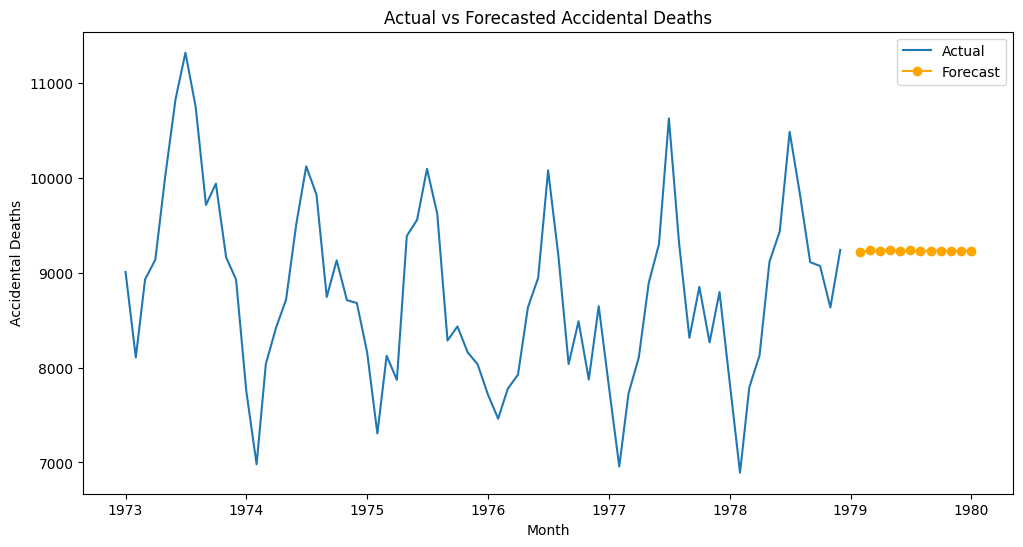

In [26]:
# Plot actual deaths and forecasted deaths
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Deaths'], label='Actual')
future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
plt.plot(future_dates, forecast, label='Forecast', color='orange', marker='o')
plt.xlabel('Month')
plt.ylabel('Accidental Deaths')
plt.title('Actual vs Forecasted Accidental Deaths')
plt.legend()
plt.show()

In [27]:
from sklearn.metrics import r2_score

# Get in-sample predictions from ARIMA model
in_sample_pred = model_fit.predict(start=0, end=len(df)-1)

# Calculate R2 score for ARIMA model
r2_arima = r2_score(df['Deaths'], in_sample_pred)
print("ARIMA Model R2 Score:", r2_arima)

ARIMA Model R2 Score: -0.8166560662000468


c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\SubudhiK\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                             Deaths   No. Observations:                   72
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -423.523
Date:                            Wed, 26 Nov 2025   AIC                            857.047
Time:                                    20:26:15   BIC                            867.434
Sample:                                01-01-1973   HQIC                           861.102
                                     - 12-01-1978                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0950      0.424      0.224      0.823      -0.736       0.926
ma.L1         -0.4711      0.396   

C:\Users\SubudhiK\AppData\Local\Temp\ipykernel_23380\2295728305.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]


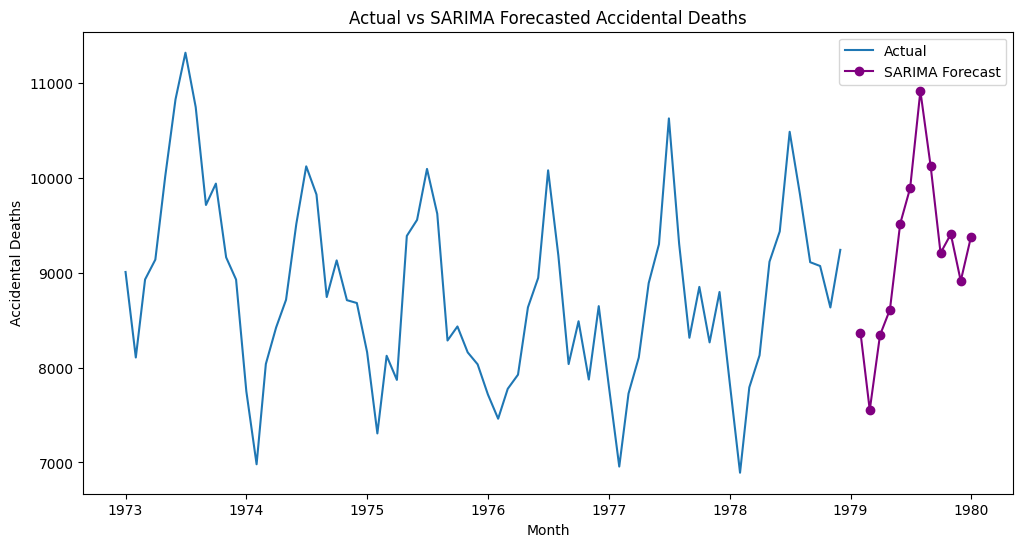

SARIMA Model R2 Score: -0.9219587177361264


In [28]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Fit SARIMA model (seasonal order: (P, D, Q, S), here S=12 for monthly data)
sarima_model = SARIMAX(df['Deaths'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12))
sarima_fit = sarima_model.fit()

# Print summary
print(sarima_fit.summary())

# Forecast next 12 months
sarima_forecast = sarima_fit.forecast(steps=12)
print("SARIMA Forecasted deaths for next 12 months:")
print(sarima_forecast)

# Plot actual deaths and SARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Deaths'], label='Actual')
future_dates = pd.date_range(df.index[-1], periods=13, freq='M')[1:]
plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast', color='purple', marker='o')
plt.xlabel('Month')
plt.ylabel('Accidental Deaths')
plt.title('Actual vs SARIMA Forecasted Accidental Deaths')
plt.legend()
plt.show()

# Calculate R2 score for SARIMA model (in-sample)
sarima_in_sample_pred = sarima_fit.predict(start=0, end=len(df)-1)
r2_sarima = r2_score(df['Deaths'], sarima_in_sample_pred)
print("SARIMA Model R2 Score:", r2_sarima)